# Credit Risk Prediction


***

** Student Name: ** David Adeniji

** Project Title:** Credit Risk Prediction

***




## Application domain and datasets:

Which application domain and which datasets?

Dataset avaliable here: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor. 

It has been estimated by the International Diabetes Federation that 382 million people worldwide suffer from diabetes. The impact of diabetes has risen significantly over the last few years, which now makes it a global threat. At present, as a major cause of death, diabetes has consistently been classified in a top position. The number of people affected will reach up to 629 million by 2045, a rise of 48 percent. 

However, by making lifestyle changes, diabetes is entirely preventable and can be stopped. The chances of contracting heart disease and cancer can also be decreased by these improvements.

***


## Well-motivated analytical questions:

What are your analytical questions and what is your motivation for answering them?

From the dataset provided, determine which factors are most significant in detecting early-stage diabetes—achieved through Exploratory Data Analysis (EDA). In particular, when we arrive at data modelling in order to implement machine learning, this step is essential.

Reflecting on the gross impact of the COVID-19 pandemic it clear more then ever, health and early detection is important. There is also a desperate need for a prognostic tool that can help physicians diagnose the disease early and can therefore prescribe the behavioural changes needed to avoid the progression of the deadly disease.
***

## Plan: 

What is your plan? Include data processing, data derivation, model building and validation. The aim of your plan is to address your research questions.

* The dataset provided is already clean and not missing values, so not much data processing will be required. From the EDA, changes to the dataset may be made like removing redundant features.

* Analyzing the relationship between patient age/gender and diabetes confirmation. Try to detrimine the group most at risk

* Use statistical analysis to calculate the impact and contribution of particular patient features to early stage diagnosis.

* Identify the significance of various variables in patients by analyzing their association using three different machine learning approaches.

* Developing a comprehensive predictive model to predict Early stage diabetes risk.

***

## Initial investigations

In [1]:
import pandas as pd
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go
import numpy as np
import plotly as py
from sklearn import preprocessing

py.offline.init_notebook_mode(connected=True)

In [2]:
credit = pd.read_csv('german_credit_data.csv')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [3]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
print(credit.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


### As data is Missing At Random (MAR) and missing values look like the majority will be replacing NAN values with the most frequent occurred category in variable/column.

In [5]:
def impute_nan_most_frequent_category(df, column):
    most_frequent_category=df[column].mode()[0]
    
    # replace nan values with most occured category
    df[column + "_Imputed"] = df[column]
    df[column + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [6]:
for Columns in ['Saving accounts','Checking account']:
    impute_nan_most_frequent_category(credit,Columns)
    
# Display imputed result
credit[['Saving accounts','Saving accounts_Imputed','Checking account','Checking account_Imputed']].head(10)

,Saving accounts,Saving accounts_Imputed,Checking account,Checking account_Imputed
0,NaN,little,little,little
1,little,little,moderate,moderate
2,little,little,NaN,little
3,little,little,little,little
4,little,little,little,little
5,NaN,little,NaN,little
6,quite rich,quite rich,NaN,little
7,little,little,moderate,moderate
8,rich,rich,NaN,little
9,little,little,moderate,moderate


In [7]:
credit = credit.drop(['Saving accounts','Checking account'], axis = 1)

In [8]:
print(credit.isnull().sum())

Age                         0
Sex                         0
Job                         0
Housing                     0
Credit amount               0
Duration                    0
Purpose                     0
Risk                        0
Saving accounts_Imputed     0
Checking account_Imputed    0
dtype: int64


In [9]:
# Bias towards male in the dataset
credit.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [10]:
credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

### Basic statistics of dataset

In [11]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Mean and standard deviation for the two classes for each numeric column

In [12]:
good_credit_df = credit[credit['Risk'] == 'good']
good_credit_df.describe()

,Age,Job,Credit amount,Duration
count,700.000000,700.000000,700.000000,700.000000
mean,36.224286,1.890000,2985.457143,19.207143
std,11.381145,0.646914,2401.472278,11.079564
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1375.500000,12.000000
50%,34.000000,2.000000,2244.000000,18.000000
75%,42.250000,2.000000,3634.750000,24.000000
max,75.000000,3.000000,15857.000000,60.000000


In [13]:
print(good_credit_df.std())
print('---------------')
print(good_credit_df.mean())

Age                11.381145
Job                 0.646914
Credit amount    2401.472278
Duration           11.079564
dtype: float64
---------------
Age                36.224286
Job                 1.890000
Credit amount    2985.457143
Duration           19.207143
dtype: float64


In [14]:
bad_credit_df = credit[credit['Risk'] == 'bad'].describe()
bad_credit_df

,Age,Job,Credit amount,Duration
count,300.000000,300.000000,300.000000,300.000000
mean,33.963333,1.936667,3938.126667,24.860000
std,11.222379,0.668940,3535.818955,13.282639
min,19.000000,0.000000,433.000000,6.000000
25%,25.000000,2.000000,1352.500000,12.000000
50%,31.000000,2.000000,2574.500000,24.000000
75%,40.000000,2.000000,5141.500000,36.000000
max,74.000000,3.000000,18424.000000,72.000000


In [15]:
print(bad_credit_df.std())
print('---------------')
print(bad_credit_df.mean())

Age                96.090101
Job               105.483879
Credit amount    5895.738762
Duration           98.738503
dtype: float64
---------------
Age                66.773214
Job                38.950701
Credit amount    4462.430703
Duration           61.017830
dtype: float64


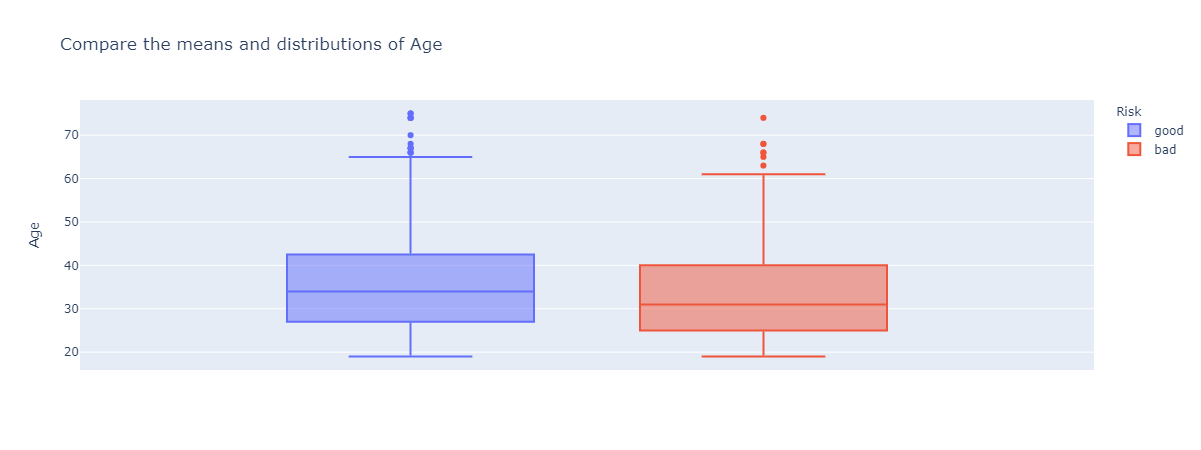

In [16]:
fig = px.box(credit, y="Age", color="Risk",
             title="Compare the means and distributions of Age",
            )
#fig.show("svg")
#fig.show()
py.offline.iplot(fig)

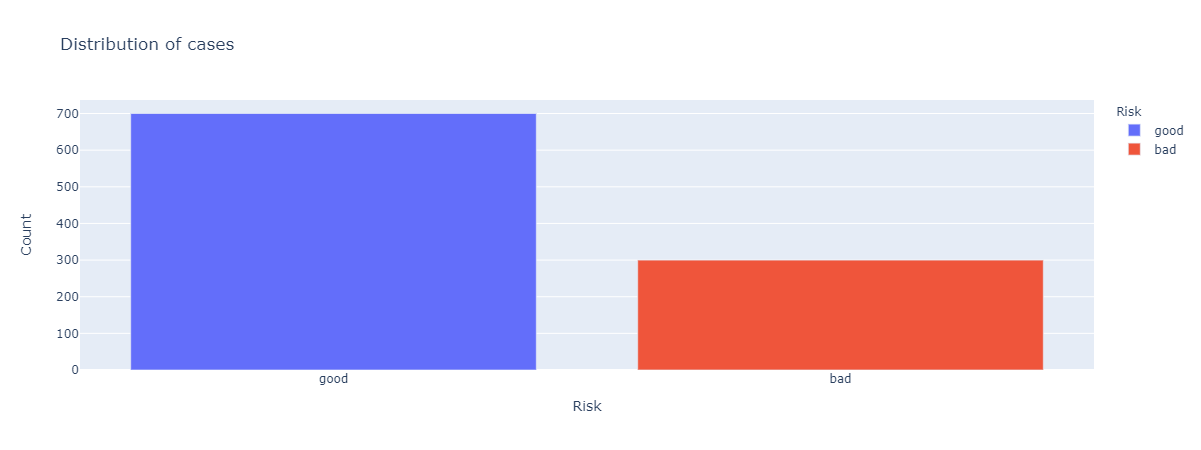

In [17]:
count = credit['Risk'].value_counts()
count = count.reset_index()

count.columns = ['Risk', 'Count']

fig = px.bar(count, y='Count', x="Risk", color='Risk',
            title='Distribution of cases')

#fig.show("svg")
py.offline.iplot(fig)

### Male vs Female basic statistics, mean and standard deviation

In [18]:
male_credit_df = credit[credit['Sex'] == 'male']
male_credit_df.describe()

,Age,Job,Credit amount,Duration
count,690.000000,690.000000,690.000000,690.000000
mean,36.778261,1.934783,3448.040580,21.560870
std,10.988784,0.642095,2900.483807,12.437941
min,20.000000,0.000000,276.000000,4.000000
25%,28.000000,2.000000,1442.500000,12.000000
50%,35.000000,2.000000,2443.500000,18.000000
75%,43.000000,2.000000,4266.250000,27.000000
max,75.000000,3.000000,15945.000000,72.000000


In [19]:
print(male_credit_df.std())
print('---------------')
print(male_credit_df.mean())

Age                10.988784
Job                 0.642095
Credit amount    2900.483807
Duration           12.437941
dtype: float64
---------------
Age                36.778261
Job                 1.934783
Credit amount    3448.040580
Duration           21.560870
dtype: float64


In [20]:
female_credit_df = credit[credit['Sex'] == 'female']
female_credit_df.describe()

,Age,Job,Credit amount,Duration
count,310.000000,310.000000,310.000000,310.000000
mean,32.803226,1.835484,2877.774194,19.438710
std,11.754363,0.674572,2603.141613,11.048047
min,19.000000,0.000000,250.000000,4.000000
25%,24.000000,2.000000,1247.500000,12.000000
50%,29.000000,2.000000,1959.000000,18.000000
75%,37.000000,2.000000,3606.500000,24.000000
max,75.000000,3.000000,18424.000000,60.000000


In [21]:
print(female_credit_df.std())
print('---------------')
print(female_credit_df.mean())

Age                11.754363
Job                 0.674572
Credit amount    2603.141613
Duration           11.048047
dtype: float64
---------------
Age                32.803226
Job                 1.835484
Credit amount    2877.774194
Duration           19.438710
dtype: float64


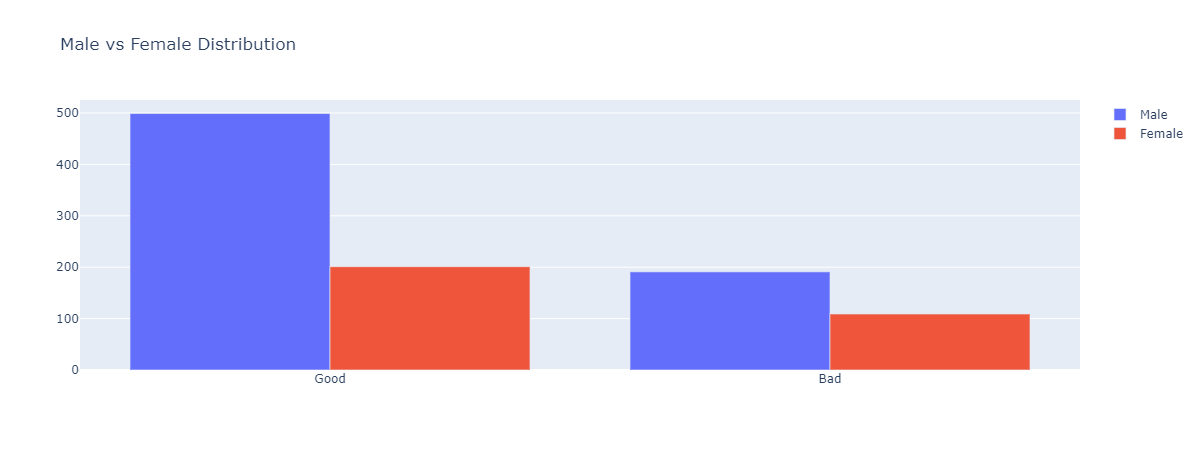

In [22]:
a = male_credit_df['Risk'].value_counts()
b = female_credit_df['Risk'].value_counts()

classs = ['Good','Bad']

fig = go.Figure(data=[
    go.Bar(name='Male', x=classs, y=[a['good'], a['bad']]),
    go.Bar(name='Female', x=classs,  y=[b['good'], b['bad']]),
])

# Change the bar mode
fig.update_layout(barmode='group', title='Male vs Female Distribution')
py.offline.iplot(fig)
#fig.show("svg")

### Feature scaling

Chose standardization over normalization as the data contains alot of outliers and some noise

It is hard to know whether rescaling the data will improve the performance of the algorithms before applying them. As a result will compare keep a non-rescaled copy of the dataset for testing algorithm performance.

In [23]:
credit.dtypes

Age                          int64
Sex                         object
Job                          int64
Housing                     object
Credit amount                int64
Duration                     int64
Purpose                     object
Risk                        object
Saving accounts_Imputed     object
Checking account_Imputed    object
dtype: object

In [24]:
from sklearn import preprocessing

standardized_df = credit

for column in ['Age', 'Job', 'Credit amount', 'Duration']:
    standardized = preprocessing.scale(credit[column])
    standardized_df[column] = standardized

In [25]:
standardized_df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Saving accounts_Imputed,Checking account_Imputed
0,2.766456,male,0.146949,own,-0.745131,-1.236478,radio/TV,good,little,little
1,-1.191404,female,0.146949,own,0.949817,2.248194,radio/TV,bad,little,moderate
2,1.183312,male,-1.383771,own,-0.416562,-0.738668,education,good,little,little
3,0.831502,male,0.146949,free,1.634247,1.750384,furniture/equipment,good,little,little
4,1.535122,male,0.146949,free,0.566664,0.256953,car,bad,little,little


### Create dummy variables for categorical data

Will be using one hot encoding for 'Sex', 'Housing' and 'Purpose' and label encoding for 'Saving accounts' and 'Checking account' as these are ordinal categorical variables and want to preserve this.

Although it could be argued that 'Housing' is ordinal. Generally everyone starts off living for free with parents then rents then owns a house. It is not clear in this dataset that there is a clear relationship between the values.

little < moderate < ...

In [26]:
dummy_df = pd.get_dummies(standardized_df, columns=['Sex', 'Housing', 'Purpose'])
dummy_df

,Age,Job,Credit amount,Duration,Risk,Saving accounts_Imputed,Checking account_Imputed,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.146949,-0.745131,-1.236478,good,little,little,0,1,0,1,0,0,0,0,0,0,1,0,0
1,-1.191404,0.146949,0.949817,2.248194,bad,little,moderate,1,0,0,1,0,0,0,0,0,0,1,0,0
2,1.183312,-1.383771,-0.416562,-0.738668,good,little,little,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0.831502,0.146949,1.634247,1.750384,good,little,little,0,1,1,0,0,0,0,0,0,1,0,0,0
4,1.535122,0.146949,0.566664,0.256953,bad,little,little,0,1,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.383771,-0.544162,-0.738668,good,little,little,1,0,0,1,0,0,0,0,0,1,0,0,0
996,0.391740,1.677670,0.207612,0.754763,good,little,little,0,1,0,1,0,0,1,0,0,0,0,0,0
997,0.215835,0.146949,-0.874503,-0.738668,good,little,little,0,1,0,1,0,0,0,0,0,0,1,0,0
998,-1.103451,0.146949,-0.505528,1.999289,bad,little,little,0,1,1,0,0,0,0,0,0,0,1,0,0


In [27]:
le = preprocessing.LabelEncoder()

columns = ['Saving accounts_Imputed', 'Checking account_Imputed']

for column in columns:
    dummy_df[column] = le.fit_transform(dummy_df[column])

In [28]:
dummy_df

,Age,Job,Credit amount,Duration,Risk,Saving accounts_Imputed,Checking account_Imputed,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.146949,-0.745131,-1.236478,good,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,-1.191404,0.146949,0.949817,2.248194,bad,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,1.183312,-1.383771,-0.416562,-0.738668,good,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0.831502,0.146949,1.634247,1.750384,good,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,1.535122,0.146949,0.566664,0.256953,bad,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.383771,-0.544162,-0.738668,good,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
996,0.391740,1.677670,0.207612,0.754763,good,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
997,0.215835,0.146949,-0.874503,-0.738668,good,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
998,-1.103451,0.146949,-0.505528,1.999289,bad,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [29]:
cols = list(dummy_df.columns)

cols = cols[:4] + cols[5:] + [cols[4]]
dummy_df = dummy_df[cols]

dummy_df

,Age,Job,Credit amount,Duration,Saving accounts_Imputed,Checking account_Imputed,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,2.766456,0.146949,-0.745131,-1.236478,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,good
1,-1.191404,0.146949,0.949817,2.248194,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,bad
2,1.183312,-1.383771,-0.416562,-0.738668,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,good
3,0.831502,0.146949,1.634247,1.750384,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,good
4,1.535122,0.146949,0.566664,0.256953,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.383771,-0.544162,-0.738668,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,good
996,0.391740,1.677670,0.207612,0.754763,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,good
997,0.215835,0.146949,-0.874503,-0.738668,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,good
998,-1.103451,0.146949,-0.505528,1.999289,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,bad


### Export preprocessed data for Machine learning models in Matlab

In [30]:
dummy_df.to_csv('credit_processed_data.csv', index=False)